In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import pickle
import numbers

In [7]:
import csv

In [84]:
data = []
data.append(12)
data.append([1,2,3])
data[0:1]


[12]

In [85]:
float("0.161747")

0.161747

In [86]:
data = []
with open('Output_180323_180424_5min_2.data ', newline='') as csvfile:
    adata = csv.reader(csvfile, delimiter=',')
    for row in adata:
        datarow = []
        datarow.append(0)
        fls=[]
        for item in list(row)[:-1]:
            a=item.strip()
            #print(f"<{a}>")
            b=float(a)
            fls.append(b)
        datarow.append(fls[0:10])
        datarow.append(fls[10:20])
        datarow.append(fls[20:30])
        data.append(datarow)

In [88]:
data

[[0,
  [0.161747,
   0.074305,
   0.121414,
   0.025312,
   0.028356,
   0.086358,
   0.119922,
   0.07418,
   0.169348,
   0.139058],
  [0.498154,
   -0.757801,
   -1.038345,
   -1.131304,
   -0.416509,
   -0.487123,
   0.589119,
   -0.145556,
   0.446597,
   0.45269],
  [0.910738,
   1.722475,
   1.653421,
   1.628318,
   5.653238,
   0.446105,
   1.165641,
   1.680468,
   0.857651,
   2.204072]],
 [0,
  [0.170725,
   0.038998,
   0.079655,
   0.120451,
   0.023798,
   0.102097,
   0.091037,
   0.135124,
   0.061288,
   0.176827],
  [0.172621,
   -1.183854,
   -1.306469,
   0.454323,
   -0.094516,
   0.533601,
   0.6897,
   0.664407,
   -1.247064,
   -0.22984],
  [1.529589,
   1.647926,
   1.61602,
   2.31222,
   5.809076,
   0.921573,
   0.99084,
   0.967017,
   1.63185,
   0.664363]],
 [0,
  [0.156369,
   0.023149,
   0.089338,
   0.154671,
   0.118047,
   0.126393,
   0.014045,
   0.115766,
   0.084544,
   0.117678],
  [0.683911,
   -0.107402,
   -0.735701,
   0.684168,
   -0.3903

In [112]:
with open("pycharm/diplom1/Output_180323_180424_5min_win312.txt", "rb") as text_file:
        deser = text_file.read()

In [113]:
deserialized_a = pickle.loads(deser)

In [114]:
datas = deserialized_a

In [115]:
datas[0]

[-656.1166370085832,
 array([0.04619363, 0.1063975 , 0.07436057, 0.1203223 , 0.13549595,
        0.05438492, 0.05619555, 0.13802014, 0.14110702, 0.12752242]),
 array([ 0.0687646 ,  0.00783762, -0.06760955, -0.07604737,  0.06392699,
        -0.0188617 ,  0.00691058,  0.03490207, -0.08593171, -0.06759181]),
 array([1.46220142, 1.74902976, 2.18799649, 2.28128902, 1.48831203,
        1.87341193, 1.753184  , 0.58099335, 2.49673841, 2.95616795])]

In [105]:
len(datas)

2080

In [106]:
range(1,5)

range(1, 5)

In [107]:
def collapsedata(data, i, j):
    if (data[1][i] == 0) or (data[1][j]== 0):
        return data
    if data[1][i]<data[1][j]:
        i,j = j,i
    print("before collapse {0}:{1}, {2}:{3}\n".format(data[1][i],data[3][i],data[3][j],data[1][j]))
    data[3][i] = (data[3][i]*data[1][i] + data[3][j]*data[1][j])/(data[1][i]+data[1][j])
    print("after collapse {0}:{1}, {2}:{3}\n".format(data[1][i],data[3][i],data[3][j],data[1][j]))
    data[1][i] = data[1][i]+data[1][j]
    data[1][j] = 0        
    return data

In [116]:
delta = 0.1
for idx,data in enumerate(datas):
    #if not isinstance(data[0], numbers.Number):
    #    continue
    for i in range(len(data[1])):
        for j in range(i+1,len(data[1])):
            if abs(data[3][i]-data[3][j]) <= delta:
                #collapse
                datas[idx] = collapsedata(data, i, j)
                print(data)

before collapse 0.13549595290306732:1.4883120252889552, 1.46220141543429:0.04619362658010813

after collapse 0.13549595290306732:1.4816735391147, 1.46220141543429:0.04619362658010813

[-656.1166370085832, array([0.        , 0.1063975 , 0.07436057, 0.1203223 , 0.18168958,
       0.05438492, 0.05619555, 0.13802014, 0.14110702, 0.12752242]), array([ 0.0687646 ,  0.00783762, -0.06760955, -0.07604737,  0.06392699,
       -0.0188617 ,  0.00691058,  0.03490207, -0.08593171, -0.06759181]), array([1.46220142, 1.74902976, 2.18799649, 2.28128902, 1.48167354,
       1.87341193, 1.753184  , 0.58099335, 2.49673841, 2.95616795])]
before collapse 0.10639750408167287:1.7490297555400103, 1.7531839953299277:0.05619554549228226

after collapse 0.10639750408167287:1.7504655473632886, 1.7531839953299277:0.05619554549228226

[-656.1166370085832, array([0.        , 0.16259305, 0.07436057, 0.1203223 , 0.18168958,
       0.05438492, 0.        , 0.13802014, 0.14110702, 0.12752242]), array([ 0.0687646 ,  0.007837

       1.92459533, 1.80796131, 0.61037148, 2.47699249, 3.29257125])]
before collapse 0.10689281007730708:1.8037866725544691, 1.8079613064684585:0.056455070357039804

after collapse 0.10689281007730708:1.805229478244402, 1.8079613064684585:0.056455070357039804

[-666.6651468089867, array([0.        , 0.16334788, 0.07426776, 0.11994432, 0.18304486,
       0.05457473, 0.        , 0.13814803, 0.14005192, 0.12662051]), array([ 0.05608697, -0.02480709, -0.12697686, -0.14481766,  0.04960977,
       -0.05952132, -0.02602423,  0.03499782, -0.1973269 , -0.49620395]), array([1.5081578 , 1.80522948, 2.1898636 , 2.26680578, 1.5282348 ,
       1.92459533, 1.80796131, 0.61037148, 2.47699249, 3.29257125])]
before collapse 0.11994432240793351:2.266805777161312, 2.1898636004077194:0.07426775748775072

after collapse 0.11994432240793351:2.237382669562728, 2.1898636004077194:0.07426775748775072

[-666.6651468089867, array([0.        , 0.16334788, 0.        , 0.19421208, 0.18304486,
       0.05457473, 0.  

       1.88045032, 1.7586367 , 0.60740301, 2.4629311 , 3.31704211])]
before collapse 0.13710433900880414:1.4840557665778866, 1.4577633159702224:0.04679161068579578

after collapse 0.13710433900880414:1.4773657545637422, 1.4577633159702224:0.04679161068579578

[-661.4534072516452, array([0.        , 0.1067173 , 0.0738956 , 0.11933069, 0.18389595,
       0.05439156, 0.05635838, 0.1399136 , 0.13934379, 0.12615314]), array([ 0.13010283,  0.06627126, -0.00809194, -0.02137717,  0.12484871,
        0.04040455,  0.06534894,  0.06502074, -0.06483568, -0.35748285]), array([1.45776332, 1.75434013, 2.16160374, 2.24280435, 1.47736575,
       1.88041051, 1.75865549, 0.60948785, 2.46271834, 3.31656577])]
before collapse 0.10671730268232775:1.7543401318098426, 1.7586554947100286:0.0563583800534762

after collapse 0.10671730268232775:1.7558315059884892, 1.7586554947100286:0.0563583800534762

[-661.4534072516452, array([0.        , 0.16307568, 0.0738956 , 0.11933069, 0.18389595,
       0.05439156, 0.   

       1.85487934, 1.72538693, 0.58609334, 2.45954193, 3.33332459])]
before collapse 0.13577846358132117:1.4323035315646997, 1.404414072974009:0.04638341886667909

after collapse 0.13577846358132117:1.425202109344021, 1.404414072974009:0.04638341886667909

[-652.7046360363485, array([0.        , 0.10511426, 0.07277559, 0.11756238, 0.18216188,
       0.0535403 , 0.05550978, 0.15120612, 0.1374008 , 0.12472889]), array([ 0.09586471,  0.0230456 , -0.06217455, -0.07665274,  0.08993623,
       -0.00679243,  0.02198332,  0.07779896, -0.12193939, -0.42351543]), array([1.40441407, 1.72077295, 2.15051026, 2.23453983, 1.42520211,
       1.85487598, 1.72537486, 0.58607647, 2.45955037, 3.33333601])]
before collapse 0.1051142563348452:1.7207729534434442, 1.7253748572341392:0.05550978096318691

after collapse 0.1051142563348452:1.7223633173499446, 1.7253748572341392:0.05550978096318691

[-652.7046360363485, array([0.        , 0.16062404, 0.07277559, 0.11756238, 0.18216188,
       0.0535403 , 0.      


[-602.9087216927416, array([0.        , 0.10617203, 0.07307452, 0.11786734, 0.18437125,
       0.05399353, 0.05606552, 0.14726805, 0.13718744, 0.12400032]), array([ 0.14367186,  0.11620239,  0.09063597,  0.08944913,  0.14222127,
        0.10387161,  0.11573882,  0.0252203 ,  0.07916028, -0.23665817]), array([1.19333232, 1.44527734, 1.77644607, 1.83243737, 1.20949244,
       1.55382722, 1.44901629, 0.50529081, 1.98404507, 3.02068469])]
before collapse 0.10617202826220291:1.4452773366725227, 1.4490162912562772:0.05606551997753453

after collapse 0.10617202826220291:1.4465694323383227, 1.4490162912562772:0.05606551997753453

[-602.9087216927416, array([0.        , 0.16223755, 0.07307452, 0.11786734, 0.18437125,
       0.05399353, 0.        , 0.14726805, 0.13718744, 0.12400032]), array([ 0.14367186,  0.11620239,  0.09063597,  0.08944913,  0.14222127,
        0.10387161,  0.11573882,  0.0252203 ,  0.07916028, -0.23665817]), array([1.19333232, 1.44656943, 1.77644607, 1.83243737, 1.20949244,

[-586.9554941906919, array([0.        , 0.10439633, 0.07158698, 0.1154834 , 0.18320519,
       0.05296975, 0.0551223 , 0.16076768, 0.13449699, 0.12197138]), array([ 0.10265423,  0.08050873,  0.05671881,  0.05607546,  0.10180175,
        0.06904827,  0.08008779,  0.0069149 ,  0.04852769, -0.2749406 ]), array([1.1143811 , 1.37347028, 1.73108887, 1.79158202, 1.13054308,
       1.48911782, 1.37741862, 0.47287898, 1.94890198, 3.03252031])]
before collapse 0.10439632837111935:1.3734702834167853, 1.3774186212078798:0.055122304854826915

after collapse 0.10439632837111935:1.3748346474098134, 1.3774186212078798:0.055122304854826915

[-586.9554941906919, array([0.        , 0.15951863, 0.07158698, 0.1154834 , 0.18320519,
       0.05296975, 0.        , 0.16076768, 0.13449699, 0.12197138]), array([ 0.10265423,  0.08050873,  0.05671881,  0.05607546,  0.10180175,
        0.06904827,  0.08008779,  0.0069149 ,  0.04852769, -0.2749406 ]), array([1.1143811 , 1.37483465, 1.73108887, 1.79158202, 1.13054308

       1.25018462, 1.1573089 , 0.38974335, 1.7092728 , 2.008242  ])]
[-532.1697209199504, array([0.        , 0.21528409, 0.        , 0.19332783, 0.18179117,
       0.        , 0.        , 0.14187736, 0.14042301, 0.12729653]), array([ 0.12456156,  0.14381915,  0.14582094,  0.14977178,  0.12763778,
        0.14369   ,  0.14386688, -0.00370617,  0.16501635,  0.22159648]), array([0.94955032, 1.17901546, 1.49027167, 1.53230831, 0.962502  ,
       1.25018462, 1.1573089 , 0.38974335, 1.7092728 , 2.008242  ])]
before collapse 0.13539626970251178:0.9716852773921125, 0.9542438935233514:0.04620740793056821

after collapse 0.13539626970251178:0.9672474755270765, 0.9542438935233514:0.04620740793056821

[-533.0000142726062, array([0.        , 0.10558818, 0.07384224, 0.11957877, 0.18160368,
       0.05392364, 0.05576514, 0.14187456, 0.14049144, 0.12733236]), array([ 0.12640192,  0.1475977 ,  0.1510306 ,  0.15512212,  0.12969053,
        0.14803379,  0.14766684, -0.00506891,  0.17054118,  0.22694585])

       1.23463801, 1.14054629, 0.37996207, 1.67698388, 1.96042329])]
before collapse 0.11917302213707212:1.5336164786474256, 1.4687422475565965:0.07358421508179813

after collapse 0.11917302213707212:1.5088510304456888, 1.4687422475565965:0.07358421508179813

[-524.1828483082484, array([0.        , 0.21440358, 0.        , 0.19275724, 0.18131477,
       0.        , 0.        , 0.14461292, 0.14002637, 0.12688513]), array([ 0.05823726,  0.07523958,  0.08710468,  0.09531875,  0.06075967,
        0.07619438,  0.07530469, -0.00955553,  0.12289686,  0.21559609]), array([0.92767494, 1.16252503, 1.46874225, 1.50885103, 0.94079694,
       1.23463801, 1.14054629, 0.37996207, 1.67698388, 1.96042329])]
[-524.1828483082484, array([0.        , 0.21440358, 0.        , 0.19275724, 0.18131477,
       0.        , 0.        , 0.14461292, 0.14002637, 0.12688513]), array([ 0.05823726,  0.07523958,  0.08710468,  0.09531875,  0.06075967,
        0.07619438,  0.07530469, -0.00955553,  0.12289686,  0.21559609])

       1.27915289, 1.18564267, 0.40377197, 1.73066611, 2.30557898])]
before collapse 0.13628103662781585:0.9854505478309797, 0.9671519282399735:0.04657261743265003

after collapse 0.13628103662781585:0.980789910261901, 0.9671519282399735:0.04657261743265003

[-539.375766782714, array([0.        , 0.10510364, 0.07263342, 0.11735992, 0.18285365,
       0.05347095, 0.05550142, 0.15094144, 0.13729214, 0.12484341]), array([ 0.05757236,  0.0426936 , -0.04151523, -0.06143397,  0.05807234,
        0.02208771,  0.04211788,  0.00475865, -0.11576949, -0.35376114]), array([0.96715193, 1.18238431, 1.50081712, 1.56456616, 0.98078991,
       1.27920223, 1.18565425, 0.40408932, 1.73087278, 2.30582977])]
before collapse 0.10510364023296746:1.1823843101877163, 1.279202233902088:0.05347094930939635

after collapse 0.10510364023296746:1.2150310684490022, 1.279202233902088:0.05347094930939635

[-539.375766782714, array([0.        , 0.15857459, 0.07263342, 0.11735992, 0.18285365,
       0.        , 0.055501

       1.33113092, 1.24325937, 0.41526648, 1.75346642, 2.30064368])]
before collapse 0.11905207052169986:1.5956556563997677, 1.5360560570623092:0.07368668885693347

after collapse 0.11905207052169986:1.5728699066806375, 1.5360560570623092:0.07368668885693347

[-550.9358745609335, array([0.        , 0.21635732, 0.        , 0.19273876, 0.18274659,
       0.        , 0.        , 0.14291042, 0.13917355, 0.12607336]), array([ 0.0512941 ,  0.05453713,  0.00464261, -0.00930049,  0.05310279,
        0.04404896,  0.05428575, -0.0244167 , -0.05163843, -0.26173521]), array([1.02755152, 1.26372418, 1.53605606, 1.57286991, 1.04154906,
       1.33113092, 1.24325937, 0.41526648, 1.75346642, 2.30064368])]
[-550.9358745609335, array([0.        , 0.21635732, 0.        , 0.19273876, 0.18274659,
       0.        , 0.        , 0.14291042, 0.13917355, 0.12607336]), array([ 0.0512941 ,  0.05453713,  0.00464261, -0.00930049,  0.05310279,
        0.04404896,  0.05428575, -0.0244167 , -0.05163843, -0.26173521])


[-556.9067117727761, array([0.        , 0.21614279, 0.        , 0.19339861, 0.18217984,
       0.        , 0.        , 0.1420839 , 0.13976204, 0.12643282]), array([ 0.0367046 ,  0.03358125, -0.0104832 , -0.02396206,  0.03743579,
        0.02431323,  0.03333938, -0.02147174, -0.06702075, -0.27960488]), array([1.04460759, 1.29908602, 1.57947631, 1.6149414 , 1.05946067,
       1.37139378, 1.27711839, 0.42385796, 1.78558646, 2.29246567])]
[-556.9067117727761, array([0.        , 0.21614279, 0.        , 0.19339861, 0.18217984,
       0.        , 0.        , 0.1420839 , 0.13976204, 0.12643282]), array([ 0.0367046 ,  0.03358125, -0.0104832 , -0.02396206,  0.03743579,
        0.02431323,  0.03333938, -0.02147174, -0.06702075, -0.27960488]), array([1.04460759, 1.29908602, 1.57947631, 1.6149414 , 1.05946067,
       1.37139378, 1.27711839, 0.42385796, 1.78558646, 2.29246567])]
before collapse 0.13591737740205212:1.0648138807029062, 1.0449174943927506:0.04638591931720889

after collapse 0.13591737

       1.47418044, 1.3738386 , 0.4436866 , 1.88375528, 2.33167026])]
before collapse 0.12000133529424155:1.7409645780318699, 1.684509401623653:0.07418824925054116

after collapse 0.12000133529424155:1.7193964248856841, 1.684509401623653:0.07418824925054116

[-573.8137138284878, array([0.        , 0.16145159, 0.        , 0.19418958, 0.18038205,
       0.05412092, 0.        , 0.14252153, 0.14048677, 0.12684756]), array([ 0.02531691,  0.00258601, -0.05953384, -0.0752936 ,  0.02427834,
       -0.01366738,  0.00208396, -0.0008788 , -0.12212814, -0.32039395]), array([1.11268862, 1.37144712, 1.6845094 , 1.71939642, 1.1296777 ,
       1.47418044, 1.3738386 , 0.4436866 , 1.88375528, 2.33167026])]
before collapse 0.13462815734620398:1.138601175194844, 1.115905322347065:0.0459200604004356

after collapse 0.13462815734620398:1.132828784048497, 1.115905322347065:0.0459200604004356

[-574.6100510979518, array([0.        , 0.10578358, 0.07427963, 0.12014515, 0.18054822,
       0.0541917 , 0.05587519,

       1.54703219, 1.44246867, 0.48666317, 2.07181922, 2.76844114])]
before collapse 0.10525718489369251:1.4386799618800905, 1.44246866862619:0.05558623926995633

after collapse 0.10525718489369251:1.4399893095317429, 1.44246866862619:0.05558623926995633

[-596.4166597101698, array([0.        , 0.16084342, 0.07287771, 0.11771793, 0.18221635,
       0.05363356, 0.        , 0.14991277, 0.13764676, 0.1251515 ]), array([-0.00787235, -0.03252358, -0.06168478, -0.06606671, -0.00993875,
       -0.04242897, -0.03287609,  0.00633624, -0.07265065, -0.0507282 ]), array([1.17434843, 1.43998931, 1.7853709 , 1.86059728, 1.19161434,
       1.54703219, 1.44246867, 0.48666317, 2.07181922, 2.76844114])]
before collapse 0.11771792874213452:1.8605972809570381, 1.7853708985475896:0.07287770941727723

after collapse 0.11771792874213452:1.8318331051831758, 1.7853708985475896:0.07287770941727723

[-596.4166597101698, array([0.        , 0.16084342, 0.        , 0.19059564, 0.18221635,
       0.05363356, 0.     

       1.55063755, 1.44354743, 0.48767519, 2.10719327, 2.80145882])]
before collapse 0.11746662133124439:1.8858598325806646, 1.805176380318746:0.07271626075349445

after collapse 0.11746662133124439:1.8550105842736817, 1.805176380318746:0.07271626075349445

[-599.003497225093, array([0.        , 0.1607916 , 0.        , 0.19018288, 0.18261569,
       0.05356179, 0.        , 0.15036046, 0.13741633, 0.12507124]), array([0.05654888, 0.0395533 , 0.03282452, 0.03380067, 0.05507822,
       0.03491783, 0.0393532 , 0.02249763, 0.03930605, 0.08292579]), array([1.17939146, 1.4410467 , 1.80517638, 1.85501058, 1.19621124,
       1.55063755, 1.44354743, 0.48767519, 2.10719327, 2.80145882])]
before collapse 0.13599910044424285:1.1998593432593305, 1.1772083704152865:0.04646534604808787

after collapse 0.13599910044424285:1.1940911768479712, 1.1772083704152865:0.04646534604808787

[-598.4910024920791, array([0.        , 0.10512091, 0.07264834, 0.11735932, 0.18246445,
       0.05350881, 0.05551203, 0.15

       1.51414713, 1.41170963, 0.45196535, 1.96691354, 2.49093578])]
before collapse 0.13457172271928663:1.1765390579894783, 1.153903437928227:0.04591140170449177

after collapse 0.13457172271928663:1.170780995850537, 1.153903437928227:0.04591140170449177

[-584.7800645886663, array([0.        , 0.10537713, 0.0736884 , 0.11915966, 0.18048312,
       0.05388957, 0.05565702, 0.14601177, 0.13948704, 0.12624627]), array([0.05971934, 0.06703509, 0.10659217, 0.11942139, 0.05997494,
       0.07528561, 0.06725837, 0.01149305, 0.16192193, 0.37287058]), array([1.15390344, 1.40826739, 1.74110667, 1.80427559, 1.170781  ,
       1.51417654, 1.41192909, 0.45490348, 1.96629206, 2.48955938])]
before collapse 0.10537713060102395:1.4082673870675273, 1.4119290914294789:0.05565702069587258

after collapse 0.10537713060102395:1.4095329543637438, 1.4119290914294789:0.05565702069587258

[-584.7800645886663, array([0.        , 0.16103415, 0.0736884 , 0.11915966, 0.18048312,
       0.05388957, 0.        , 0.14

       1.79351673, 1.67169608, 0.67273618, 2.8595155 , 6.08088184])]
before collapse 0.10066598459818439:1.6676675905771055, 1.6716960786248714:0.053108680579858195

after collapse 0.10066598459818439:1.6690588970364684, 1.6716960786248714:0.053108680579858195

[-694.8680495283865, array([0.        , 0.15377467, 0.064865  , 0.10392778, 0.18716715,
       0.04991436, 0.        , 0.20974149, 0.11992969, 0.11067987]), array([ 0.04005021,  0.03286159, -0.03100495, -0.06517801,  0.04004083,
        0.02455881,  0.03263955,  0.03121044, -0.19348558, -1.51554061]), array([1.40951224, 1.6690589 , 2.21348022, 2.38003616, 1.42574016,
       1.79351673, 1.67169608, 0.67273618, 2.8595155 , 6.08088184])]
before collapse 0.13903093342468129:1.4438250924271752, 1.4214530077825889:0.047837563163302774

after collapse 0.13903093342468129:1.4380979311783755, 1.4214530077825889:0.047837563163302774

[-695.9983412021555, array([0.        , 0.10062728, 0.0649169 , 0.10402479, 0.1868685 ,
       0.04991788,

        4.38559   ,  3.80446883,  1.14507526,  7.74282791, 10.31399922])]
before collapse 0.12772121442034998:2.8071202348884072, 2.7276656841618454:0.04399846360787387

after collapse 0.12772121442034998:2.7867621827492224, 2.7276656841618454:0.04399846360787387

[-916.6644658634876, array([0.        , 0.09277811, 0.06276923, 0.10175834, 0.17171968,
       0.04651438, 0.04896171, 0.24118104, 0.12057728, 0.11374023]), array([-0.1504976 , -0.36658965, -0.75208096, -0.8258443 , -0.16555798,
       -0.48366099, -0.37042996,  0.00158985, -1.00755266, -1.5401286 ]), array([ 2.72766568,  3.81806903,  6.05956686,  6.56544238,  2.78676218,
        4.41548691,  3.83712711,  1.14779007,  7.7511432 , 10.30093641])]
before collapse 0.09277811109148987:3.8180690263741957, 3.8371271119128036:0.04896171321175546

after collapse 0.09277811109148987:3.824652331546848, 3.8371271119128036:0.04896171321175546

[-916.6644658634876, array([0.        , 0.14173982, 0.06276923, 0.10175834, 0.17171968,
       0

before collapse 0.09690564808728908:4.851371126312304, 4.871014389105797:0.0511622569675521

after collapse 0.09690564808728908:4.858158509833058, 4.871014389105797:0.0511622569675521

[-969.2903913183098, array([0.        , 0.14806791, 0.06715961, 0.10894969, 0.17316941,
       0.04913016, 0.        , 0.20576728, 0.12878365, 0.1189723 ]), array([ 0.0251504 , -0.13288277, -0.40597052, -0.46184403,  0.01462984,
       -0.21576789, -0.13565837,  0.04141379, -0.60305708, -0.99596518]), array([ 3.63305755,  4.85815851,  6.93749274,  7.35867817,  3.70536423,
        5.4490914 ,  4.87101439,  1.40280085,  8.2981836 , 10.18007715])]
before collapse 0.12904062107589706:3.7386485503489246, 3.641783184567534:0.044276756606814203

after collapse 0.12904062107589706:3.7139027096162986, 3.641783184567534:0.044276756606814203

[-969.8351719480688, array([0.        , 0.09701463, 0.06723455, 0.10906825, 0.17331738,
       0.04918696, 0.05121989, 0.20497854, 0.12891369, 0.11906611]), array([ 0.03706289


after collapse 0.13350140835686378:3.591220928664151, 3.5334396604059597:0.04576229485911158

[-959.869317297308, array([0.        , 0.10067094, 0.06906752, 0.11175128, 0.1792637 ,
       0.05094712, 0.05314837, 0.18267745, 0.13140912, 0.1210645 ]), array([ 0.4618478 ,  0.48332749,  0.46802952,  0.43921183,  0.46466347,
        0.48841999,  0.48352786,  0.15720025,  0.30465114, -0.42570571]), array([3.53343966, 4.50760217, 6.20849143, 6.5843311 , 3.59122093,
       4.98805394, 4.52341504, 1.49392699, 7.51636714, 9.85746873])]
before collapse 0.10067093996868812:4.507602166751045, 4.523415041027363:0.05314837332662123

after collapse 0.10067093996868812:4.513065905519603, 4.523415041027363:0.05314837332662123

[-959.869317297308, array([0.        , 0.15381931, 0.06906752, 0.11175128, 0.1792637 ,
       0.05094712, 0.        , 0.18267745, 0.13140912, 0.1210645 ]), array([ 0.4618478 ,  0.48332749,  0.46802952,  0.43921183,  0.46466347,
        0.48841999,  0.48352786,  0.15720025,  0.304

       3.56658978, 3.28383203, 1.1957366 , 5.54634656, 8.40698434])]
before collapse 0.10299158024379565:3.2747493821126334, 3.283832031073835:0.054360820312514234

after collapse 0.10299158024379565:3.277887181386085, 3.283832031073835:0.054360820312514234

[-880.4654569824661, array([0.        , 0.1573524 , 0.06906081, 0.11136035, 0.18517548,
       0.05174211, 0.        , 0.17496653, 0.13015014, 0.12019217]), array([ 0.33845535,  0.38974368,  0.41548888,  0.41096476,  0.34431125,
        0.40339146,  0.39028321,  0.06757067,  0.36190336, -0.37501739]), array([2.72922334, 3.27788718, 4.45400003, 4.751384  , 2.76282793,
       3.56658978, 3.28383203, 1.1957366 , 5.54634656, 8.40698434])]
before collapse 0.1378392222607085:2.771548616638863, 2.7263207742238302:0.04726254270884958

after collapse 0.1378392222607085:2.7600004672513028, 2.7263207742238302:0.04726254270884958

[-880.1675787072938, array([0.        , 0.10293391, 0.06901887, 0.11129318, 0.18510176,
       0.05171155, 0.05433

       3.28966054, 3.04714581, 1.11384812, 5.42674504, 8.63006091])]
before collapse 0.10167901245019781:3.039521120010267, 3.0471458063437584:0.05365845393647451

after collapse 0.10167901245019781:3.0421549268433674, 3.0471458063437584:0.05365845393647451

[-863.7265717108908, array([0.        , 0.15533747, 0.06719272, 0.10818007, 0.18497345,
       0.05082029, 0.        , 0.18970187, 0.12625518, 0.11753896]), array([ 0.05036283,  0.06102445,  0.00493254, -0.03082656,  0.05153117,
        0.05940689,  0.0610804 ,  0.06313515, -0.17404571, -1.24914404]), array([2.56758013, 3.04215493, 4.17471736, 4.50736371, 2.59809573,
       3.28966054, 3.04714581, 1.11384812, 5.42674504, 8.63006091])]
before collapse 0.1377241883818842:2.6090059578865583, 2.5680324117451216:0.04727744392252716

after collapse 0.1377241883818842:2.5985351068682205, 2.5680324117451216:0.04727744392252716

[-863.7970940570749, array([0.        , 0.10169634, 0.06720437, 0.10819873, 0.18500163,
       0.0508291 , 0.0536

       2.69591418, 2.56471309, 0.90102801, 3.33960799, 7.3878212 ])]
before collapse 0.11138635459941965:3.0385459885840653, 2.9563521300376285:0.06947585301243243

after collapse 0.11138635459941965:3.0069722921756252, 2.9563521300376285:0.06947585301243243

[-791.1487075130002, array([0.        , 0.16003669, 0.        , 0.18086221, 0.18664446,
       0.05264686, 0.        , 0.17584168, 0.12813631, 0.11583179]), array([-0.14723444, -0.15867421, -0.12610969, -0.12684934, -0.15055724,
       -0.14971554, -0.15846729,  0.02043315, -0.1572612 ,  0.40539607]), array([2.17932293, 2.56146728, 2.95635213, 3.00697229, 2.20617692,
       2.69591418, 2.56471309, 0.90102801, 3.33960799, 7.3878212 ])]
before collapse 0.13902429870607153:2.206845382511418, 2.1707156412602546:0.047615998527505886

after collapse 0.13902429870607153:2.1976278998363794, 2.1707156412602546:0.047615998527505886

[-790.3829193544062, array([0.        , 0.10467662, 0.06940823, 0.11127558, 0.1866403 ,
       0.05260404, 0.

       2.54045836, 2.41437801, 0.8563232 , 3.1614004 , 7.3951734 ])]
before collapse 0.13885198973669352:2.0760691349390936, 2.0420300323377396:0.04759398473565535

after collapse 0.13885198973669352:2.067379987671586, 2.0420300323377396:0.04759398473565535

[-775.4406471907552, array([0.        , 0.10385729, 0.0684621 , 0.10968016, 0.18644597,
       0.05207324, 0.0548162 , 0.18473466, 0.12599746, 0.11393293]), array([-0.2022762 , -0.22540941, -0.18195408, -0.17853031, -0.20749142,
       -0.21560235, -0.22522248,  0.04015313, -0.20058834,  0.36810272]), array([2.04203003, 2.40364236, 2.78699406, 2.86567937, 2.06737999,
       2.53523653, 2.40841149, 0.85287367, 3.15779376, 7.39959823])]
before collapse 0.10385728764068367:2.4036423615772033, 2.4084114853454786:0.05481619713075683

after collapse 0.10385728764068367:2.4052899287747054, 2.4084114853454786:0.05481619713075683

[-775.4406471907552, array([0.        , 0.15867348, 0.0684621 , 0.10968016, 0.18644597,
       0.05207324, 0.  

       2.50525151, 2.36427838, 0.85789899, 3.17915272, 7.40760098])]
before collapse 0.10880925495223798:2.87205459810428, 2.786547414970355:0.06790765651533516

after collapse 0.10880925495223798:2.8391964388390996, 2.786547414970355:0.06790765651533516

[-771.8040023862045, array([0.        , 0.15766229, 0.        , 0.17671691, 0.18650608,
       0.05167652, 0.        , 0.1890766 , 0.1250635 , 0.1132981 ]), array([-0.02611001,  0.0335511 ,  0.1794061 ,  0.19770684, -0.02432299,
        0.07841585,  0.0349625 ,  0.03556848,  0.20363254,  0.79740116]), array([1.97458116, 2.36083844, 2.78654741, 2.83919644, 2.00051689,
       2.50525151, 2.36427838, 0.85789899, 3.17915272, 7.40760098])]
before collapse 0.13884407267275034:2.009157618173332, 1.9743012870166923:0.04763553067290906

after collapse 0.13884407267275034:2.0002536962313737, 1.9743012870166923:0.04763553067290906

[-771.7387385631098, array([0.        , 0.10318065, 0.06789583, 0.10879022, 0.1864796 ,
       0.05166781, 0.054455

       2.27287522, 2.13651786, 0.81473738, 3.1185877 , 6.89624678])]
before collapse 0.10312995585775446:2.131757779997972, 2.1365178610363125:0.05442172860845695

after collapse 0.10312995585775446:2.1334020140110868, 2.1365178610363125:0.05442172860845695

[-752.8835568536254, array([0.        , 0.15755168, 0.06740314, 0.10804738, 0.18814507,
       0.05145956, 0.        , 0.19025161, 0.12445441, 0.11268715]), array([ 0.02075606,  0.05536253,  0.16475262,  0.20400854,  0.02300702,
        0.0770055 ,  0.05601566, -0.04227245,  0.3240582 ,  1.68696529]), array([1.80578993, 2.13340201, 2.65030522, 2.77850469, 1.82710114,
       2.27287522, 2.13651786, 0.81473738, 3.1185877 , 6.89624678])]
before collapse 0.1400262852747702:1.834354748415923, 1.8057122500125518:0.04808326808470469

after collapse 0.1400262852747702:1.8270333503011065, 1.8057122500125518:0.04808326808470469

[-752.7955172324514, array([0.        , 0.10310975, 0.0673901 , 0.10802659, 0.18810955,
       0.05144947, 0.05441

       2.25326914, 2.11826338, 0.79909641, 3.09946236, 6.8896225 ])]
before collapse 0.14017476918809105:1.8229949535184746, 1.7952160765886962:0.04813711579015643

after collapse 0.14017476918809105:1.8158939943015684, 1.7952160765886962:0.04813711579015643

[-751.3693134987435, array([0.        , 0.10313483, 0.06734259, 0.10793929, 0.18831188,
       0.05144331, 0.05442358, 0.19052648, 0.12431123, 0.11256681]), array([ 0.00338564,  0.05910894,  0.18577505,  0.22699694,  0.00768655,
        0.08762053,  0.06002134, -0.04453589,  0.35078972,  1.722073  ]), array([1.79521608, 2.1139892 , 2.62944049, 2.75780893, 1.81589399,
       2.25351145, 2.11868321, 0.8023724 , 3.09892061, 6.88733983])]
before collapse 0.1031348304596076:2.1139892040074497, 2.1186832065741403:0.05442357882574095

after collapse 0.1031348304596076:2.11561059901807, 2.1186832065741403:0.05442357882574095

[-751.3693134987435, array([0.        , 0.15755841, 0.06734259, 0.10793929, 0.18831188,
       0.05144331, 0.     

       2.05389302, 1.92324862, 0.64481104, 2.83507066, 4.07842374])]
before collapse 0.13729348972754854:1.6414831064452995, 1.6150002549928448:0.0469238146748171

after collapse 0.13729348972754854:1.6347373969819723, 1.6150002549928448:0.0469238146748171

[-695.1228961084116, array([0.        , 0.10533778, 0.07184441, 0.11584907, 0.1842173 ,
       0.0533777 , 0.05561804, 0.15504299, 0.13513097, 0.12358173]), array([-0.04356344,  0.01787961,  0.14825397,  0.18253825, -0.0398869 ,
        0.05391145,  0.01904533, -0.04413272,  0.29789786,  0.90462117]), array([1.61500025, 1.9173365 , 2.38551015, 2.49788965, 1.6347374 ,
       2.05281094, 1.92188863, 0.64485669, 2.83496788, 4.07989673])]
before collapse 0.10533778432477153:1.9173365039114503, 1.921888625105847:0.05561804162640919

after collapse 0.10533778432477153:1.9189094824885362, 1.921888625105847:0.05561804162640919

[-695.1228961084116, array([0.        , 0.16095583, 0.07184441, 0.11584907, 0.1842173 ,
       0.0533777 , 0.     

       1.89659778, 1.7882188 , 0.61379113, 2.54572793, 4.0012274 ])]
before collapse 0.10603279185523314:1.7843520221561386, 1.7882188003960087:0.05598453021315351

after collapse 0.10603279185523314:1.7856881741208415, 1.7882188003960087:0.05598453021315351

[-672.9486517053543, array([0.        , 0.16201732, 0.07199867, 0.11592144, 0.18526947,
       0.05369775, 0.        , 0.15344122, 0.13471382, 0.12294031]), array([-0.08016758, -0.07790243, -0.07859568, -0.07542965, -0.08098899,
       -0.07543808, -0.07778402, -0.02251274, -0.03160529,  0.5247933 ]), array([1.51414188, 1.78568817, 2.15405961, 2.24282834, 1.53235755,
       1.89659778, 1.7882188 , 0.61379113, 2.54572793, 4.0012274 ])]
before collapse 0.11592143716604439:2.2428283420532193, 2.154059607482519:0.07199867308394929

after collapse 0.11592143716604439:2.2088179793946976, 2.154059607482519:0.07199867308394929

[-672.9486517053543, array([0.        , 0.16201732, 0.        , 0.18792011, 0.18526947,
       0.05369775, 0.   

       2.14898664, 2.01438618, 0.66575556, 2.95731344, 4.27726695])]
before collapse 0.10458412019140913:2.0096994799262995, 2.014386178217882:0.05522173038841198

after collapse 0.10458412019140913:2.011318992531943, 2.014386178217882:0.05522173038841198

[-705.5575758156648, array([0.        , 0.15980585, 0.07144025, 0.11521723, 0.1824988 ,
       0.05303212, 0.        , 0.16088989, 0.13439775, 0.12271811]), array([-0.13037235, -0.12478223, -0.03320623,  0.00409867, -0.13100751,
       -0.11089673, -0.12445447, -0.03167297,  0.13008272,  0.79050821]), array([1.68497199, 2.01131899, 2.50259166, 2.61995807, 1.70705398,
       2.14898664, 2.01438618, 0.66575556, 2.95731344, 4.27726695])]
before collapse 0.13601116644821712:1.713709105619759, 1.684100884907829:0.04647914299152342

after collapse 0.13601116644821712:1.7061680765732343, 1.684100884907829:0.04647914299152342

[-705.6191492911659, array([0.        , 0.10457963, 0.0714377 , 0.11521304, 0.18249031,
       0.05303005, 0.0552193

       2.0925129 , 1.9498683 , 0.64536533, 2.95588214, 4.32467375])]
before collapse 0.13619831565766086:1.6513471610881458, 1.6231982604402464:0.04658923323461145

after collapse 0.13619831565766086:1.644172516504691, 1.6231982604402464:0.04658923323461145

[-698.9059237970494, array([0.        , 0.10387165, 0.07067368, 0.11398649, 0.18278755,
       0.05255437, 0.05484043, 0.16639562, 0.13303845, 0.12185176]), array([-0.04439835, -0.06385518, -0.01879689,  0.01026636, -0.0467318 ,
       -0.06383463, -0.0639768 , -0.00340959,  0.11978577,  0.76629766]), array([1.62319826, 1.945006  , 2.47502173, 2.60061235, 1.64417252,
       2.09249218, 1.94988893, 0.64706294, 2.9556451 , 4.32409335])]
before collapse 0.10387165403783595:1.9450060037154657, 1.9498889347047288:0.05484042523943385

after collapse 0.10387165403783595:1.946693222565382, 1.9498889347047288:0.05484042523943385

[-698.9059237970494, array([0.        , 0.15871208, 0.07067368, 0.11398649, 0.18278755,
       0.05255437, 0.   

In [114]:
datas

[[-5631.7100851616115,
  array([0.        , 0.13904047, 0.05370496, 0.08485499, 0.19410863,
         0.04329346, 0.        , 0.30849301, 0.09638218, 0.0801223 ]),
  array([-0.01673153, -0.04003737, -0.04257602, -0.01400457, -0.01890154,
         -0.04762694, -0.04031807,  0.04521269,  0.20957338, -0.60188659]),
  array([0.60038141, 0.80790401, 1.36503791, 1.47538134, 0.60848357,
         0.98385658, 0.8112647 , 0.39281469, 1.94317748, 4.59848785])],
 [-6238.461361769049,
  array([0.        , 0.13594897, 0.        , 0.15038197, 0.18265727,
         0.04515585, 0.        , 0.28945721, 0.10452084, 0.09187789]),
  array([ 0.03715242, -0.1280304 , -0.07547158,  0.03044171,  0.03071747,
         -0.18805054, -0.13102846,  0.04813547,  0.43984477, -0.63382902]),
  array([0.59067873, 1.10629855, 1.49753919, 1.55607359, 0.60421837,
         1.26737168, 1.11130235, 0.44520572, 2.0119878 , 4.78326204])],
 [-6529.755733839477,
  array([0.        , 0.14536387, 0.        , 0.16142599, 0.18213264,
  

In [117]:
x=[]
y=[]
z=[]
def addpoint(data,i,n):
    x.append(n)
    y.append(data[3][i])
    z.append(data[1][i])
    return

In [118]:
treshold = 0.1
for idx,data in enumerate(datas):
    for i in range(len(data[1])):
        if data[1][i]>treshold:
            addpoint(data,i, idx)

In [119]:
max(y)

10.983235255102375

In [120]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
import numpy as np

In [121]:
plt.rcParams['figure.figsize'] = [13, 10]
plt.figure(figsize=(3,3))

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

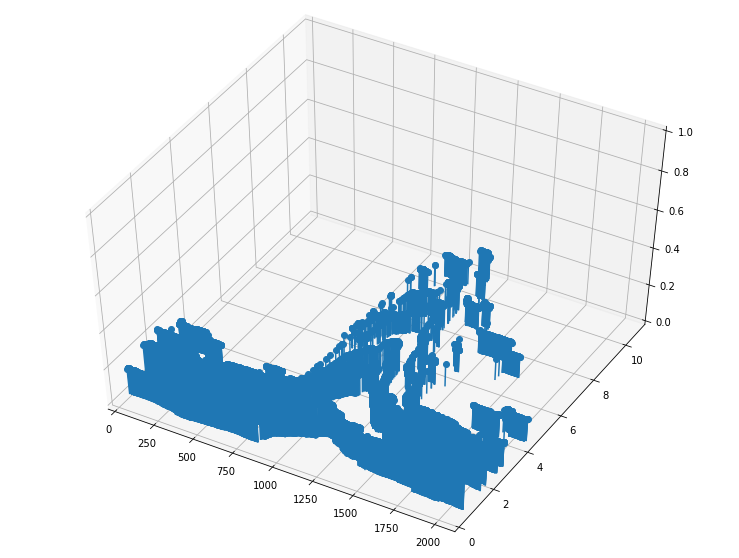

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for xi, yi, zi in zip(x, y, z):        
    line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)), marker='o', markevery=(1, 1))
    ax.add_line(line)
ax.set_xlim3d(0, max(x))
ax.set_ylim3d(0, max(y))
ax.set_zlim3d(0, 1)    
ax.view_init(50)
plt.draw()

In [126]:
x

array([ 1.00000000e+00,  9.98026728e-01,  9.92114701e-01,  9.82287251e-01,
        9.68583161e-01,  9.51056516e-01,  9.29776486e-01,  9.04827052e-01,
        8.76306680e-01,  8.44327926e-01,  8.09016994e-01,  7.70513243e-01,
        7.28968627e-01,  6.84547106e-01,  6.37423990e-01,  5.87785252e-01,
        5.35826795e-01,  4.81753674e-01,  4.25779292e-01,  3.68124553e-01,
        3.09016994e-01,  2.48689887e-01,  1.87381315e-01,  1.25333234e-01,
        6.27905195e-02, -1.60812265e-16, -6.27905195e-02, -1.25333234e-01,
       -1.87381315e-01, -2.48689887e-01, -3.09016994e-01, -3.68124553e-01,
       -4.25779292e-01, -4.81753674e-01, -5.35826795e-01, -5.87785252e-01,
       -6.37423990e-01, -6.84547106e-01, -7.28968627e-01, -7.70513243e-01,
       -8.09016994e-01, -8.44327926e-01, -8.76306680e-01, -9.04827052e-01,
       -9.29776486e-01, -9.51056516e-01, -9.68583161e-01, -9.82287251e-01,
       -9.92114701e-01, -9.98026728e-01, -1.00000000e+00, -9.98026728e-01,
       -9.92114701e-01, -

In [177]:
from mpl_toolkits.mplot3d import Axes3D

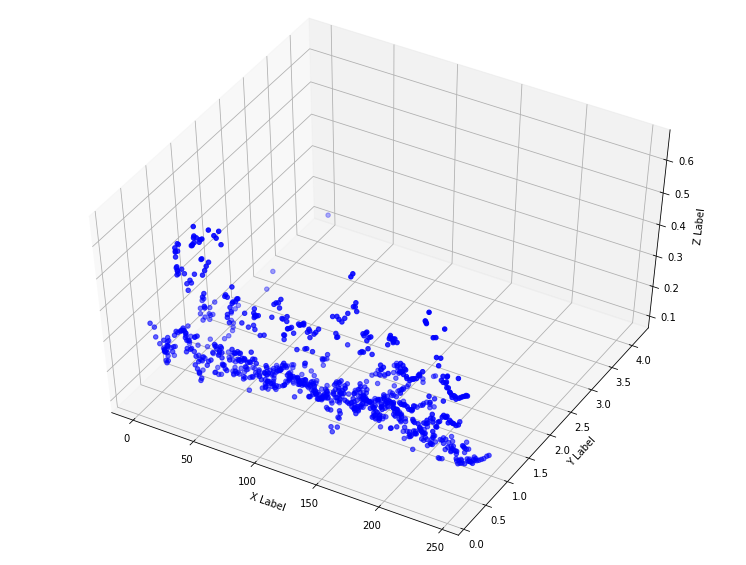

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(50)

plt.show()